Joshua Greene  
CS5473  
Hwk09 
11-8-20  

I did not do question 1.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv('hwk09.csv')

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_normalized = normalize(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns = ['x', 'y'])

df_ready = pd.DataFrame(df_normalized, columns = ['x', 'y'])

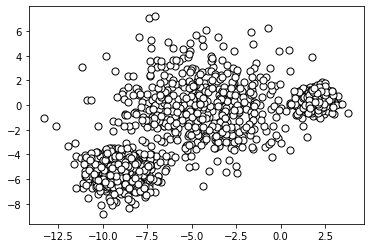

In [3]:
plt.scatter(df['x'], df['y'], c='white', marker='o', edgecolor='black', s=50)
plt.show()

2) Write a jupyter notebook that runs scikit-learn clustering algorithms on the given hwk09.csv dataset.

2a) Run k-Means algorithm using several values of k.

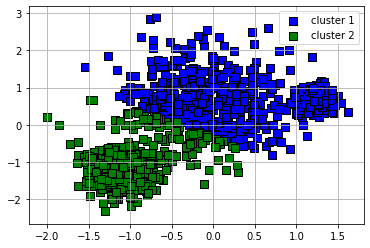

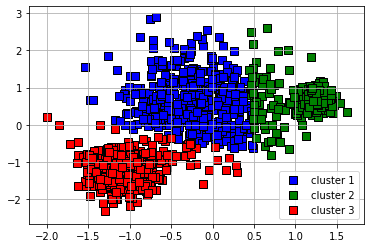

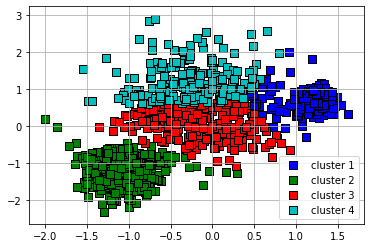

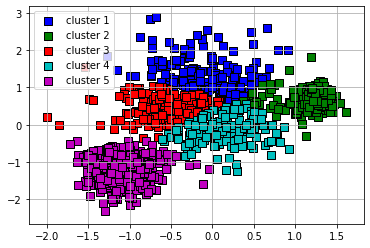

In [4]:
k_values = [2, 3, 4, 5]
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for k in k_values:
    km = KMeans(n_clusters = k,
                init = 'random',
                n_init = 10,
                max_iter = 300,
                tol = 1e-04,
                random_state = 0)

    y_km = km.fit_predict(df_scaled)
    
    for i in range(k):
        plt.scatter(df_scaled[y_km == i]['x'], 
                    df_scaled[y_km == i]['y'],
                    s=50, 
                    c=colors[i],
                    marker='s', 
                    edgecolor='black',
                    label='cluster ' + str(i+1))
    
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

2b) Run DBSCAN algorithm with several pairs of e or minPts.

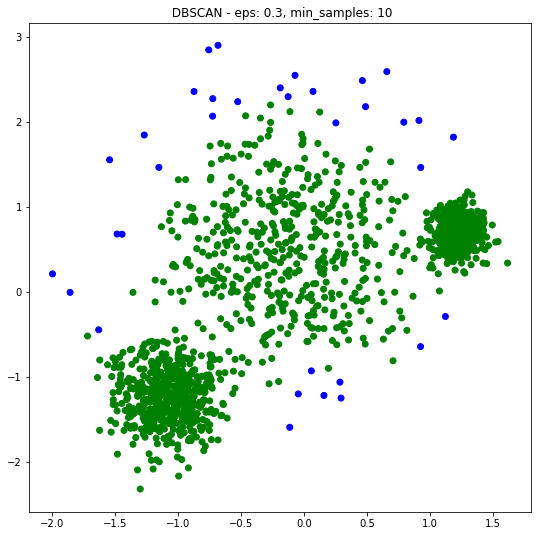

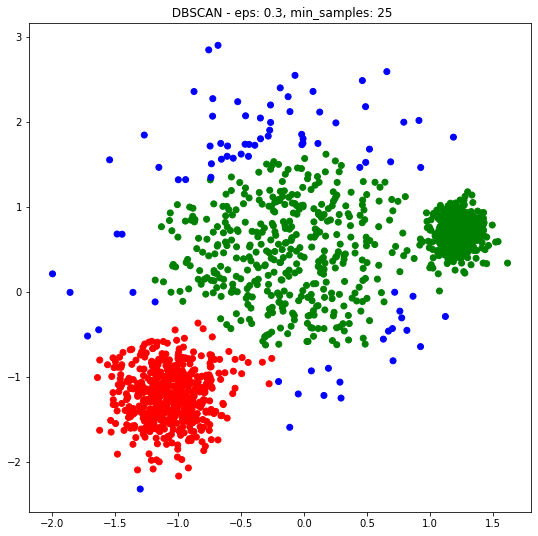

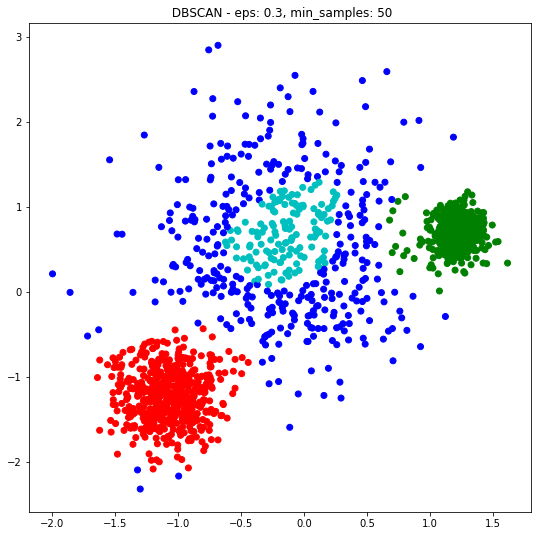

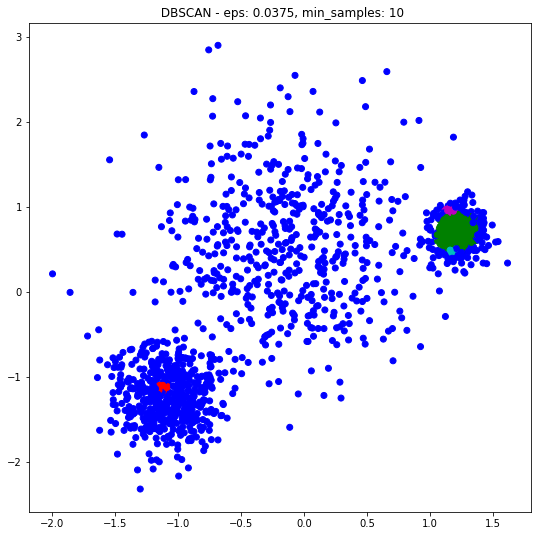

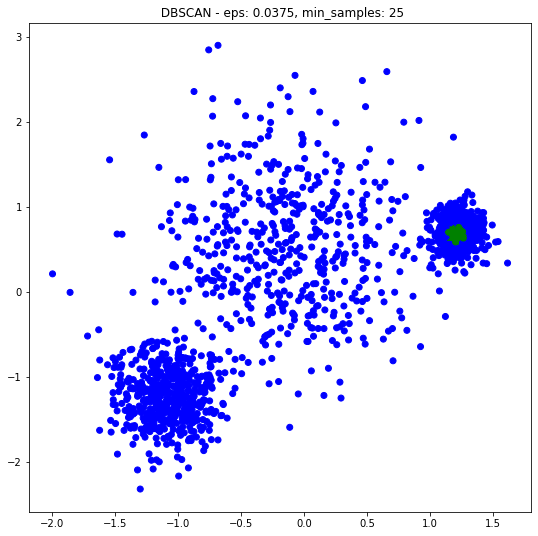

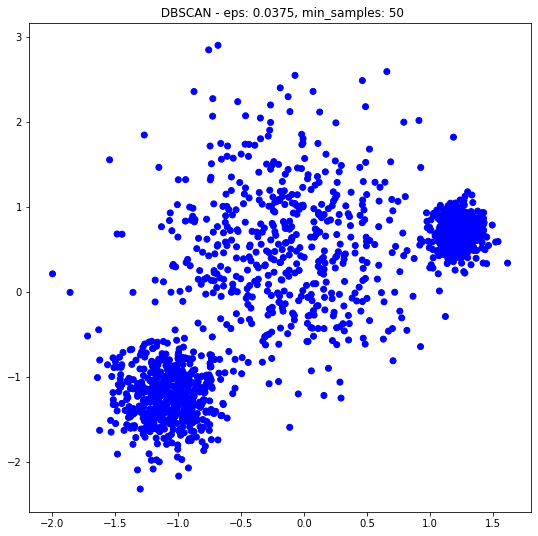

In [5]:
eps_list = [0.3, 0.0375]
samples = [10, 25, 50]

colors_dict = {}

for i in range(-1, len(colors)-1):
    colors_dict[i] = colors[i+1]

for eps in eps_list:
    for sample_num in samples:
        db = DBSCAN(eps=eps, min_samples=sample_num).fit(df_scaled)

        labels = db.labels_
        
        color_vector = [colors_dict[label] for label in labels]
        
        plt.figure(figsize = (9,9))
        plt.scatter(df_scaled['x'], df_scaled['y'], c = color_vector)
        plt.title(" DBSCAN - eps: {0}, min_samples: {1}".format(eps, sample_num))

        plt.show()



2c) Run the Agglomerative Clustering algorithm with several pairs of the affinity and linkage.

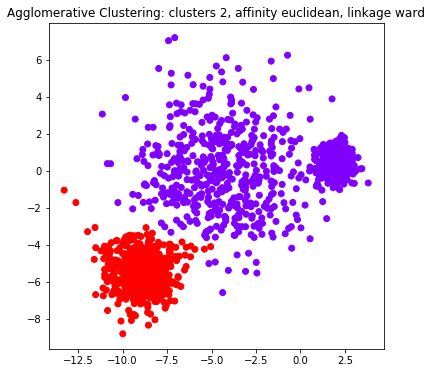

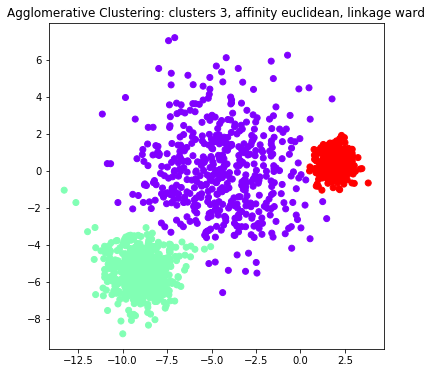

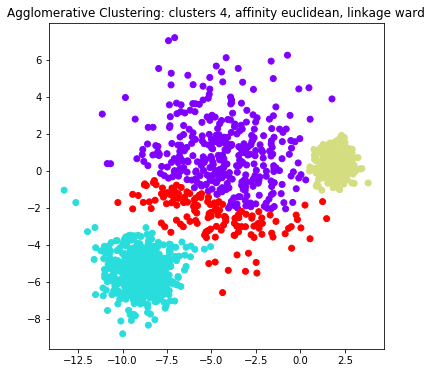

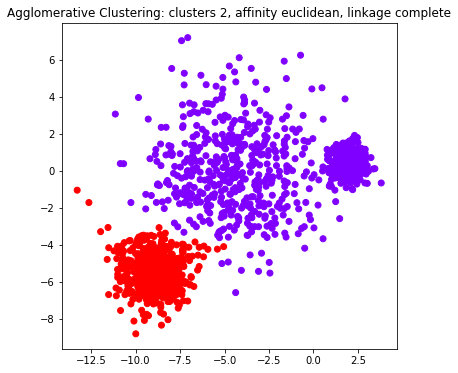

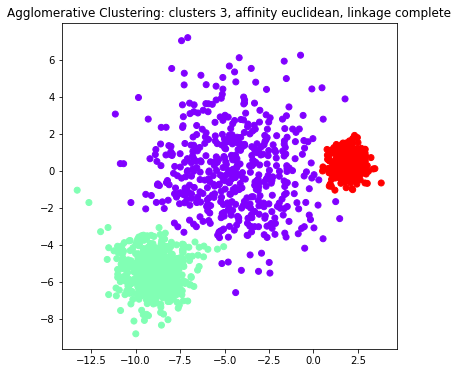

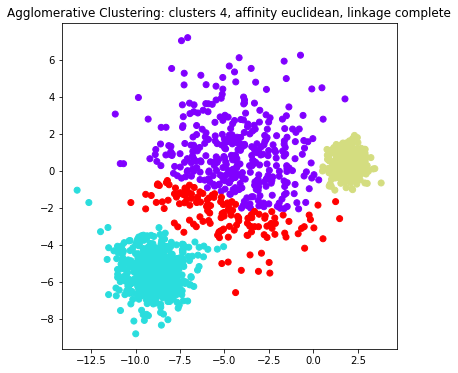

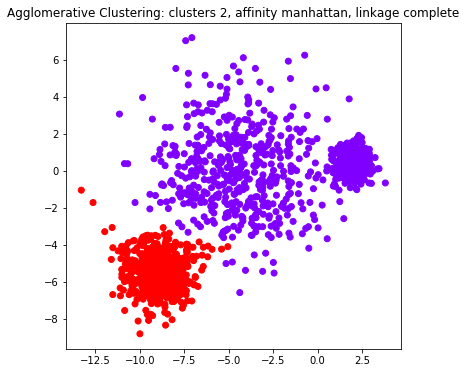

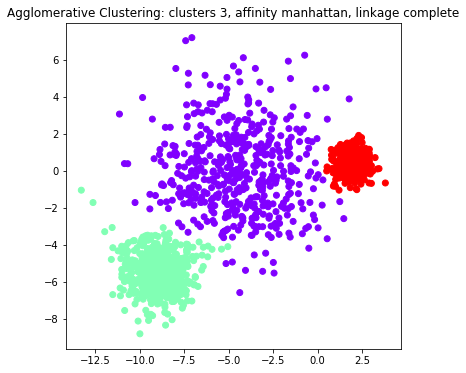

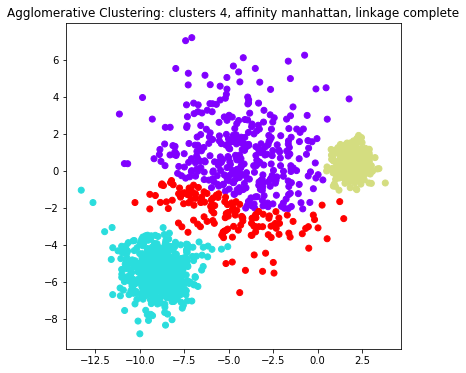

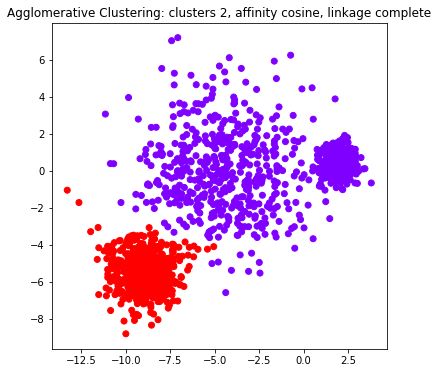

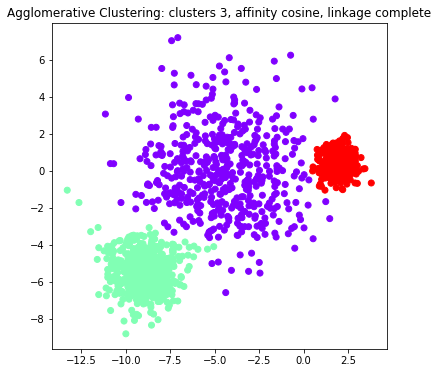

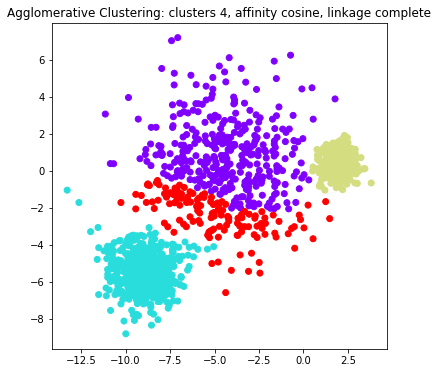

In [6]:
affinity = ['euclidean', 'manhattan', 'cosine']
linkage =  ['ward', 'complete']

for link in linkage:
    for aff in affinity:
        if link == 'ward' and aff is not 'euclidean':
            continue
            
        for i in range(2, 5):
            ac = AgglomerativeClustering(n_clusters = i)

            plt.figure(figsize = (6, 6))
            plt.scatter(df['x'], df['y'], c = ac.fit_predict(df_scaled), cmap = 'rainbow')
            plt.title("Agglomerative Clustering: clusters {0}, affinity {1}, linkage {2}".format(i, aff, link))
            plt.show()
